# Projeto de Inteligência Artificial

**Tema:** Mental Health Data

**Objetivo:** Aplicar técnicas de Supervised Learning para prever casos de depressão.

## 0. Biblioteca

In [9]:
# Instalar as dependências, se necessário
%pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report





## 1. Carregamento dos Dados

In [4]:
df = pd.read_csv("data/train.csv")
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## 2. Verificações Iniciais

In [5]:
# Definir colunas
numeric_cols = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Depression']

# Imputação
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Verificar missing values
df.isnull().sum().sum()

np.int64(0)

## 3.Análise Exploratória (EDA)

Informação geral do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      140700 non-null  float64
 8   Work Pressure                          140700 non-null  float64
 9   CGPA                                   140700 non-null  float64
 10  Study Satisfaction         

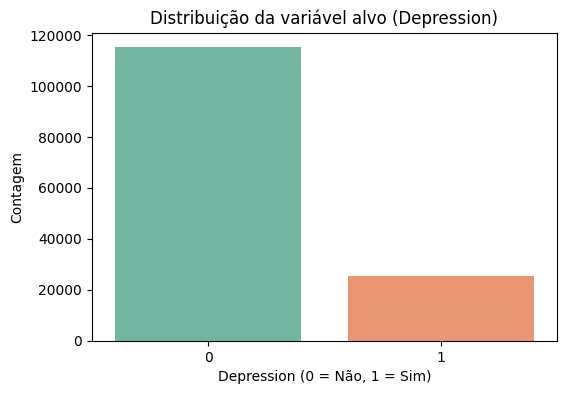

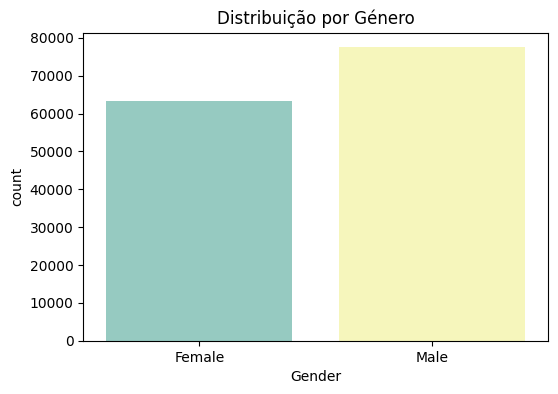

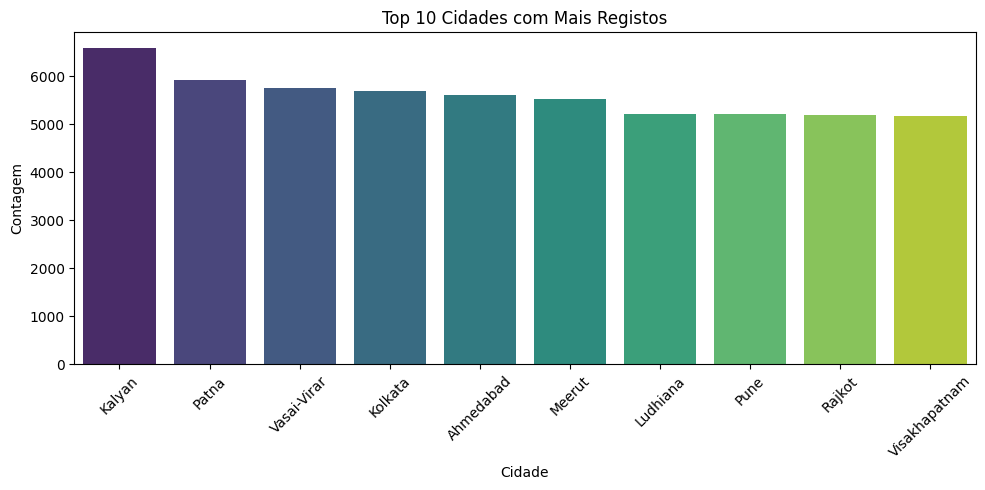

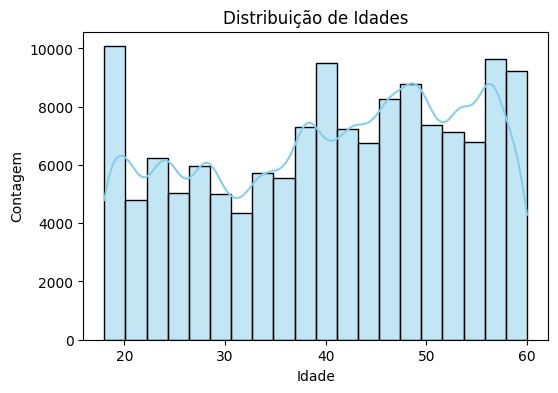

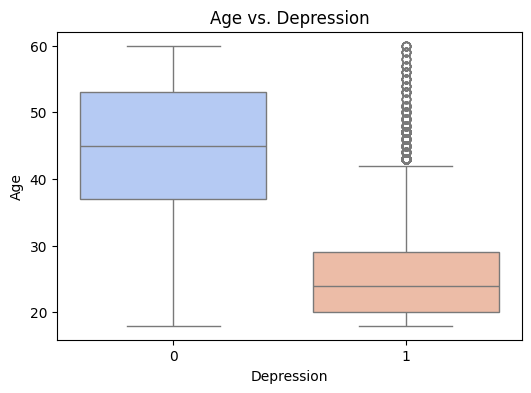

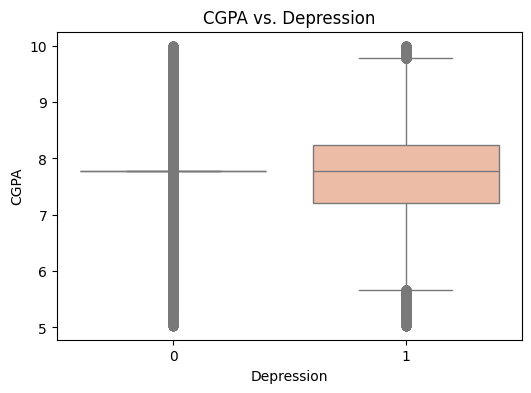

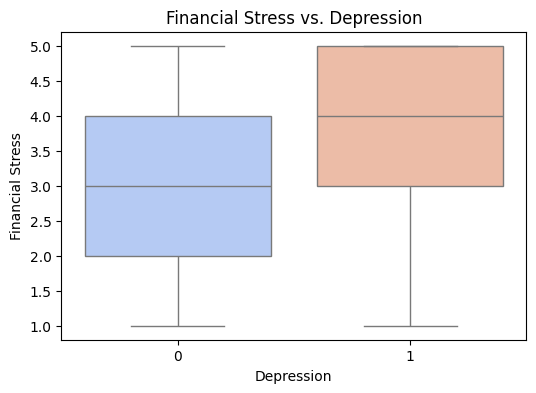

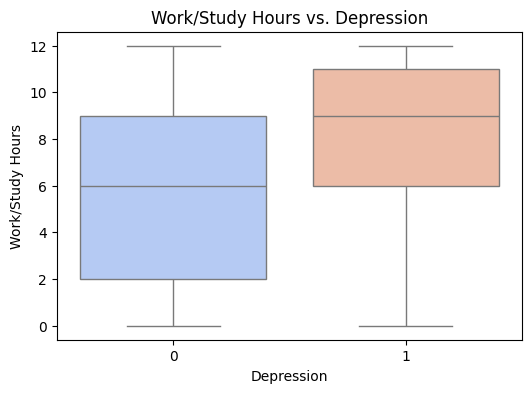

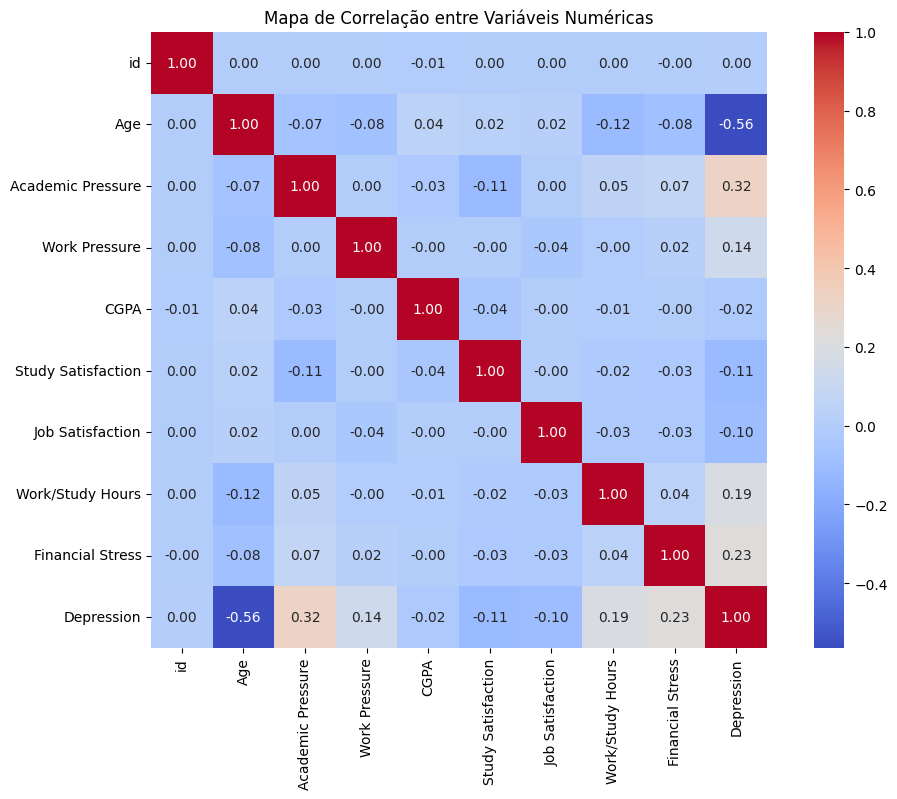


Correlação com a variável alvo (Depression):
Depression            1.000000
Age                   0.564671
Academic Pressure     0.316944
Financial Stress      0.227232
Work/Study Hours      0.191746
Work Pressure         0.137988
Study Satisfaction    0.114377
Job Satisfaction      0.103058
CGPA                  0.023050
id                    0.003944
Name: Depression, dtype: float64

Atributos com baixa correlação removidos: ['CGPA', 'id']


In [8]:
# Verificar estrutura do DataFrame
print("Informação geral do dataset:")
df.info()

# Sumário estatístico das colunas numéricas
print("\nSumário estatístico:")
print(df.describe())

# Verificar valores nulos
print("\nMissing values por coluna:")
print(df.isnull().sum())

# Distribuição da variável alvo (Depression)
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df, palette='Set2', hue="Depression", legend=False)
plt.title("Distribuição da variável alvo (Depression)")
plt.xlabel("Depression (0 = Não, 1 = Sim)")
plt.ylabel("Contagem")
plt.show()

# Distribuição por género
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set3', hue="Gender", legend=False)
plt.title("Distribuição por Género")
plt.show()

# Top 10 cidades com mais entradas
plt.figure(figsize=(10, 5))
top_cities = df['City'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis', hue=top_cities.index, legend=False)
plt.title("Top 10 Cidades com Mais Registos")
plt.ylabel("Contagem")
plt.xlabel("Cidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma das idades
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

# Boxplots para algumas variáveis numéricas vs. Depression
numeric_to_plot = ['Age', 'CGPA', 'Financial Stress', 'Work/Study Hours']

for col in numeric_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Depression', y=col, data=df, palette='coolwarm', hue="Depression", legend=False)
        plt.title(f"{col} vs. Depression")
        plt.show()

# Heatmap de correlação (só variáveis numéricas)
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

# Seleção de atributos altamente correlacionados com a variável alvo
cor_target = abs(corr["Depression"]).sort_values(ascending=False)
print("\nCorrelação com a variável alvo (Depression):")
print(cor_target)

# Podemos remover atributos com correlação muito baixa (< 0.05 por ex.)
low_corr_features = cor_target[cor_target < 0.05].index.tolist()
print("\nAtributos com baixa correlação removidos:", low_corr_features)

X = df.drop(columns=['id', 'Name', 'Depression'] + low_corr_features)


## 4. Preparação dos Dados

In [7]:
categorical_cols = [
    'Gender', 'City', 'Working Professional or Student', 'Profession',
    'Sleep Duration', 'Dietary Habits', 'Degree',
    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'
]

numeric_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress'
]

# Drop colunas irrelevantes
X = df.drop(columns=['id', 'Name', 'Depression'])
y = df['Depression']

# Imputação de missing values
num_imputer = SimpleImputer(strategy='median')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

# Label Encoding das categóricas
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# Normalização
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Split dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 5. Função de Avaliação de Modelos

In [8]:
def avaliar_modelo(modelo, nome):
    start = time.time()
    modelo.fit(X_train, y_train)
    tempo_treino = time.time() - start

    start = time.time()
    y_pred = modelo.predict(X_test)
    tempo_teste = time.time() - start

    print(f"\n{nome}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print(f"Tempo Treino: {tempo_treino:.4f}s | Tempo Teste: {tempo_teste:.4f}s")

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:,1]
    else:
        y_proba = modelo.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nome} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)


## 6. Avaliação de Modelos


Decision Tree
Accuracy: 0.9009950248756219
Precision: 0.7246572697431937
Recall: 0.7340113436338744
F1 Score: 0.7293043140303148
Tempo Treino: 0.4664s | Tempo Teste: 0.0059s


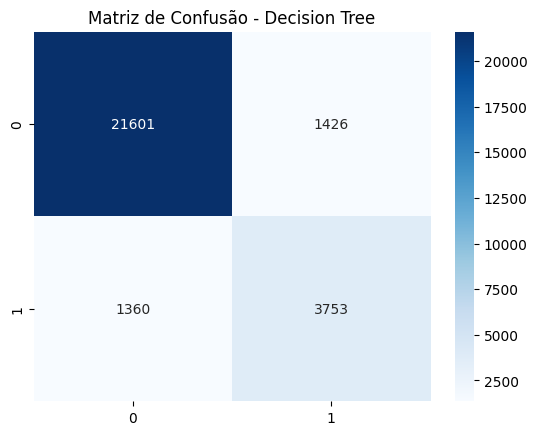

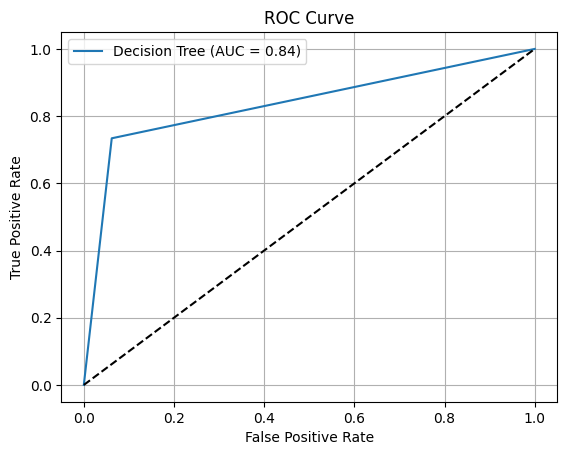


k-Nearest Neighbors
Accuracy: 0.8858564321250888
Precision: 0.7520551577830814
Recall: 0.5546645804811265
F1 Score: 0.6384511481314723
Tempo Treino: 0.0209s | Tempo Teste: 2.5457s


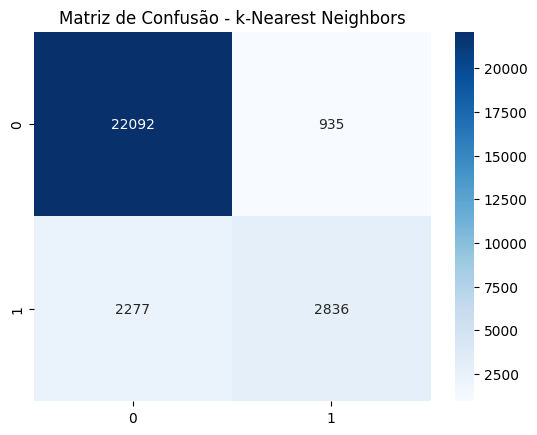

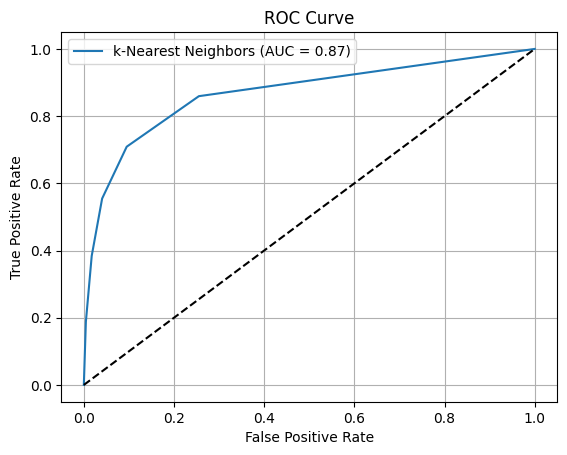


Support Vector Machine
Accuracy: 0.9271144278606965
Precision: 0.8588842006563525
Recall: 0.7166047330334442
F1 Score: 0.781319970146071
Tempo Treino: 2227.7401s | Tempo Teste: 32.6729s


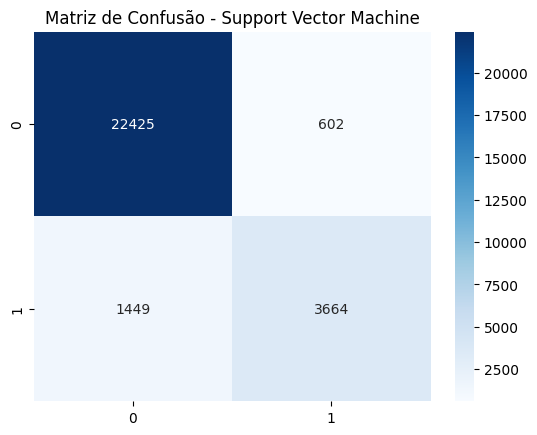

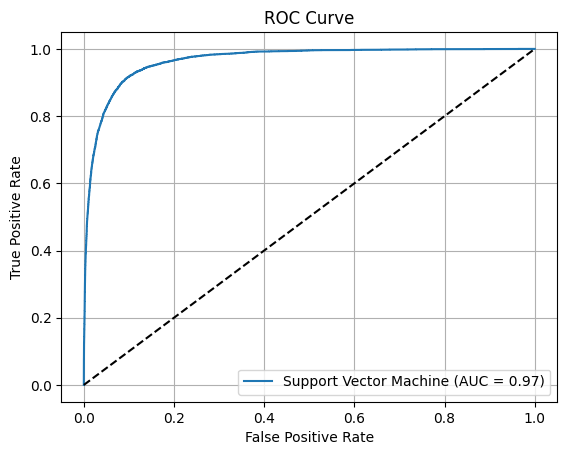


Neural Network
Accuracy: 0.9368869936034115
Precision: 0.8370026257321753
Recall: 0.8104830823391356
F1 Score: 0.8235294117647058
Tempo Treino: 15.3331s | Tempo Teste: 0.0161s


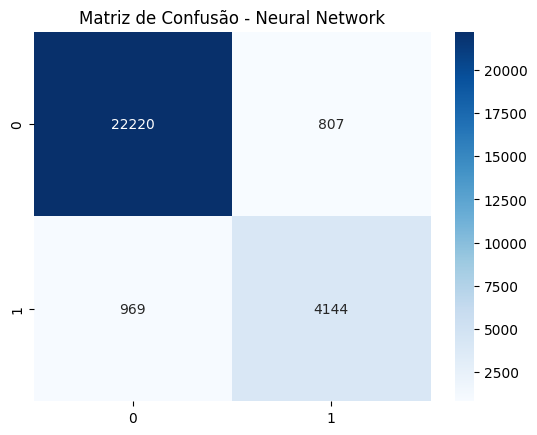

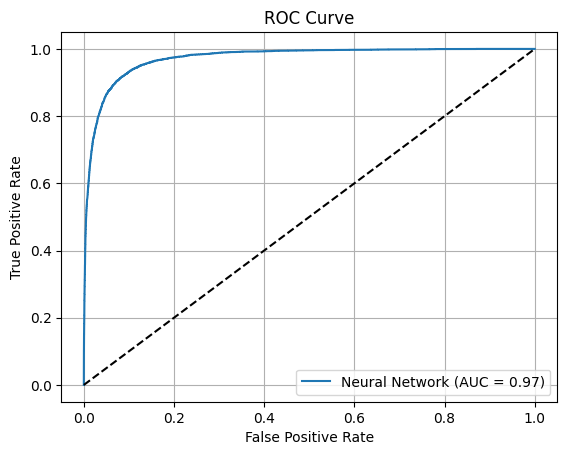

In [16]:
acc_f1_scores = {}

acc_f1_scores['Decision Tree'] = avaliar_modelo(DecisionTreeClassifier(random_state=42), "Decision Tree")
acc_f1_scores['k-NN'] = avaliar_modelo(KNeighborsClassifier(n_neighbors=5), "k-Nearest Neighbors")
acc_f1_scores['SVM'] = avaliar_modelo(SVC(kernel='rbf', probability=True, random_state=42), "Support Vector Machine")
acc_f1_scores['Neural Net'] = avaliar_modelo(MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42), "Neural Network")

7. Comparação de Modelos

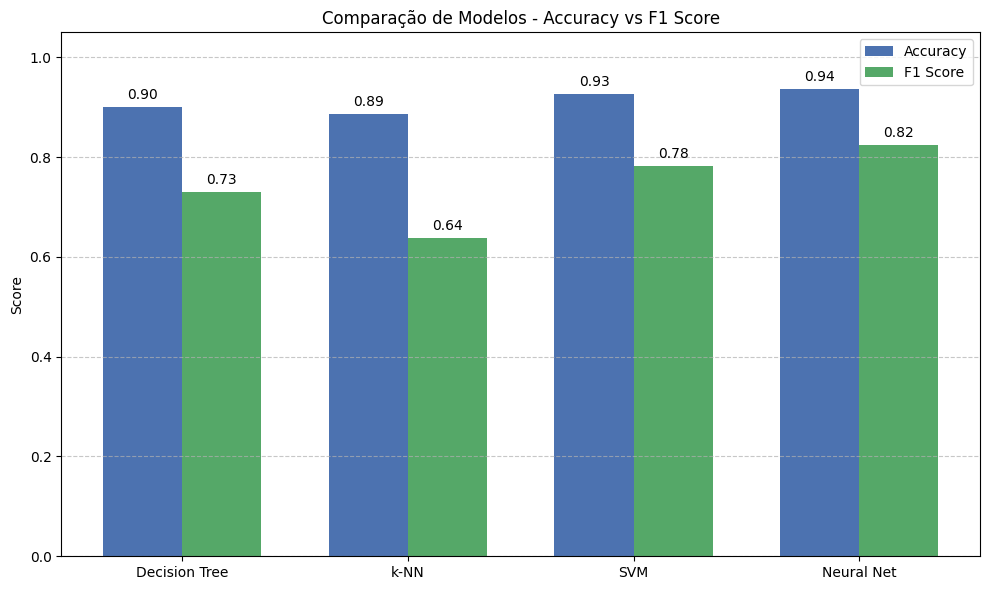

In [22]:
# Organizar resultados em DataFrame
resultados = pd.DataFrame(acc_f1_scores, index=['Accuracy', 'F1 Score']).T.reset_index()
resultados = resultados.rename(columns={'index': 'Modelo'})

plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(resultados['Modelo']))

plt.bar(x - bar_width/2, resultados['Accuracy'], bar_width, label='Accuracy', color='#4c72b0')
plt.bar(x + bar_width/2, resultados['F1 Score'], bar_width, label='F1 Score', color='#55a868')

for i, val in enumerate(resultados['Accuracy']):
    plt.text(i - bar_width/2, val + 0.01, f"{val:.2f}", ha='center', va='bottom')

for i, val in enumerate(resultados['F1 Score']):
    plt.text(i + bar_width/2, val + 0.01, f"{val:.2f}", ha='center', va='bottom')

plt.xticks(x, resultados['Modelo'], rotation=0)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Comparação de Modelos - Accuracy vs F1 Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


8. Learning Curve para o melhor modelo

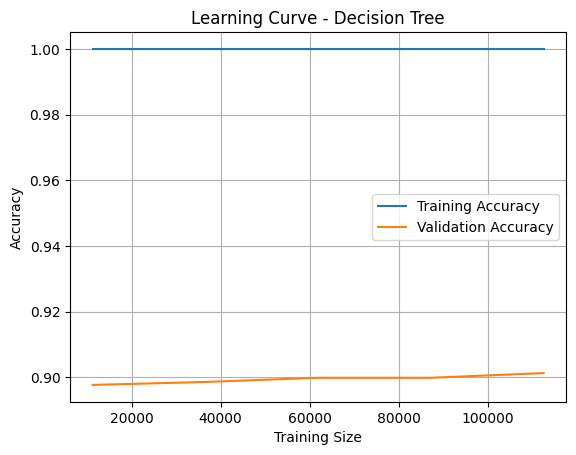

In [18]:
melhor_modelo = DecisionTreeClassifier(random_state=42)
train_sizes, train_scores, val_scores = learning_curve(melhor_modelo, X, y, cv=5, scoring='accuracy')

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy")
plt.plot(train_sizes, val_mean, label="Validation Accuracy")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.grid()
plt.show()

## 9. Erro de treino vs validação

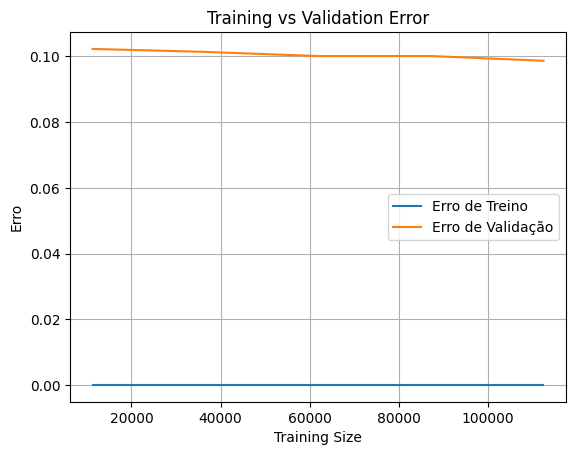

In [19]:
train_errors = 1 - train_mean
val_errors = 1 - val_mean

plt.plot(train_sizes, train_errors, label="Erro de Treino")
plt.plot(train_sizes, val_errors, label="Erro de Validação")
plt.xlabel("Training Size")
plt.ylabel("Erro")
plt.title("Training vs Validation Error")
plt.legend()
plt.grid()
plt.show()


## 10. Tabela Final 

In [23]:
for nome_modelo, modelo in zip(resultados.index, [DecisionTreeClassifier(), KNeighborsClassifier(), SVC(probability=True), MLPClassifier(max_iter=1000)]):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\nRelatório de Classificação - {nome_modelo}")
    print(classification_report(y_test, y_pred))




Relatório de Classificação - 0
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     23027
           1       0.72      0.73      0.73      5113

    accuracy                           0.90     28140
   macro avg       0.83      0.84      0.83     28140
weighted avg       0.90      0.90      0.90     28140


Relatório de Classificação - 1
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     23027
           1       0.75      0.55      0.64      5113

    accuracy                           0.89     28140
   macro avg       0.83      0.76      0.79     28140
weighted avg       0.88      0.89      0.88     28140


Relatório de Classificação - 2
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     23027
           1       0.86      0.72      0.78      5113

    accuracy                           0.93     28140
   macro avg       0.90      0.8